<a href="https://colab.research.google.com/github/2002hk/housing_price_capstone/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('/content/gurgaon_properties_missing_value_imputation.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [4]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [5]:
def categorize_floor(floor):
  if 0<=floor<=2:
    return "low floor"
  elif 3<=floor<=10:
    return "mid floor"
  elif 11<=floor<=51:
    return "high floor"
  else:
    return None


In [6]:
train_df['floor_category']=train_df['floorNum'].apply(categorize_floor)

In [7]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [8]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [9]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,floor_category,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,low floor,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,mid floor,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,high floor,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,mid floor,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,mid floor,High


In [11]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   sector           3554 non-null   object 
 2   price            3554 non-null   float64
 3   bedRoom          3554 non-null   float64
 4   bathroom         3554 non-null   float64
 5   balcony          3554 non-null   object 
 6   agePossession    3554 non-null   object 
 7   built_up_area    3554 non-null   float64
 8   study room       3554 non-null   float64
 9   servant room     3554 non-null   float64
 10  store room       3554 non-null   float64
 11  pooja room       3554 non-null   float64
 12  others           3554 non-null   float64
 13  furnishing_type  3554 non-null   float64
 14  floor_category   3554 non-null   object 
 15  luxury_category  3554 non-null   object 
dtypes: float64(10), object(6)
memory usage: 444.4+ KB


In [15]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded=train_df.copy()
categorical_columns=train_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
  oe=OrdinalEncoder()
  data_label_encoded[col]=oe.fit_transform(data_label_encoded[[col]])
  print(oe.categories_)

x_label=data_label_encoded.drop(columns=['price'])
y_label=data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [16]:
x_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,floor_category,luxury_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0


In [17]:
y_label.head()

,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48


## Techniques for feature selection
- Corelation Analysis
- Random Forest Feature Importance
- Gradient Boosting feature importance
- Permutation Importance
- LASSO
- RFE
- Linear Regression weights
- SHAP


<Axes: >

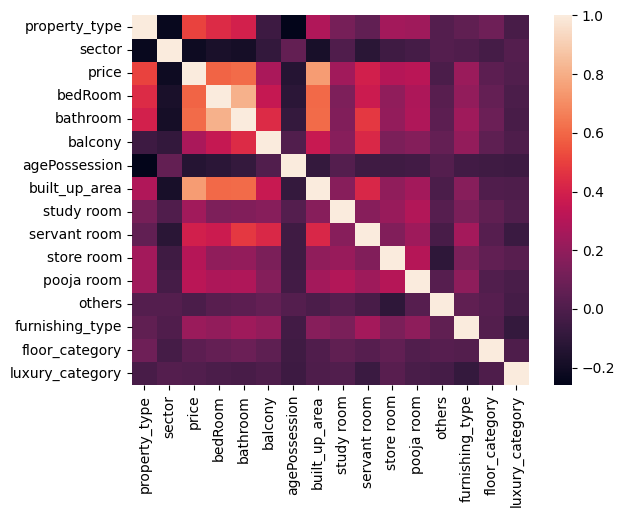

In [18]:
sns.heatmap(data_label_encoded.corr())

In [19]:
price_corr=data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'features','price':'corr_coreff'})
price_corr

,features,corr_coreff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677
